# Initialise and create random players

In [ ]:
from santorini.SantoriniPlayers import (
    RandomPlayer,
    HumanSantoriniPlayer,
    GreedySantoriniPlayer,
)
from santorini.SantoriniGame import SantoriniGame

import Arena

game = SantoriniGame(5)

ai_player_1 = RandomPlayer(game).play
ai_player_2 = GreedySantoriniPlayer(game).play

# Define alternative display function that plots boards in 3D

In [ ]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

def display_3d(board):

    # Setup the figure and axes
    fig = plt.figure(figsize=(10, 4))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.set_xlim([-0.5, 4.5])
    ax1.set_ylim([-0.5, 4.5])
    ax1.set_zlim([0, 4])

    # Create x,y indices
    _x = np.arange(5)
    _y = np.arange(5)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel() - 0.5, _yy.ravel() - 0.5

    # Create the board blocks
    top = board[1].ravel()
    bottom = np.zeros_like(top)
    colors =  ['grey'] * len(top)
    sizes =  [1] * len(top)
    player_size = 0.5

    # Get indices of the players
    players = board[0].ravel()
    red_female,     = np.where(players == -2)
    red_male,       = np.where(players == -1)
    blue_female,    = np.where(players == 1)
    blue_male,      = np.where(players == 2)

    # Add the players to the output
    for (index, colour) in [(red_male, 'firebrick'), (red_female, 'lightcoral'), (blue_male, 'navy'), (blue_female, 'royalblue')]:
        x = np.append(       x, x[index] + player_size/2)
        y = np.append(       y, y[index] + player_size/2)
        bottom = np.append(  bottom, top[index] )
        top = np.append(     top, player_size)
        colors.append(colour)
        sizes.append(player_size)

    # Present
    ax1.bar3d(x, y, bottom, sizes, sizes, top, shade=True, color=colors)
    plt.show()

## Test function on the inital board

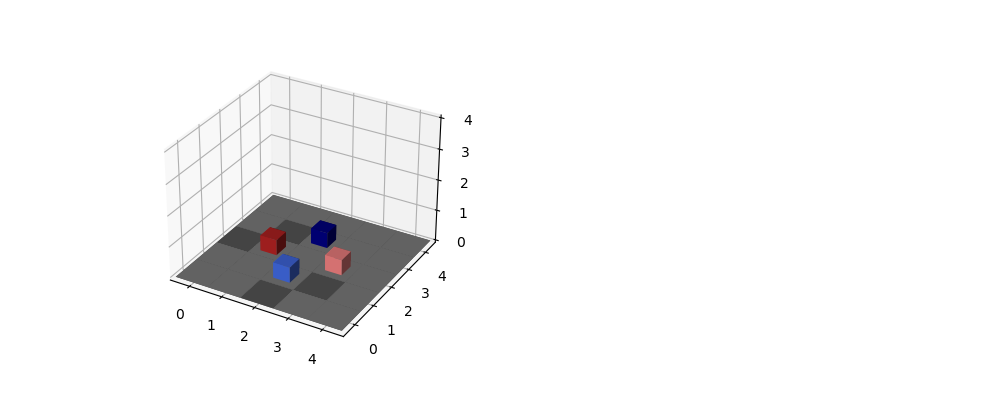

In [124]:
board = game.getInitBoard()
display_3d(board)

# Play two sample games, viewing the board position in 3D

In [ ]:
arena = Arena.Arena(ai_player_1, ai_player_2, game, display=display_3d)

%time oneWon, twoWon, draws = arena.playGames(2, verbose=True)
print("\nRandom won {} games, Greedy Random won {} games".format(oneWon, twoWon))